In [50]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import csv
from scipy.stats import sem


In [51]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [52]:
drug_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

In [53]:
drug_data.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [54]:
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [56]:
#merge the two data frames into one
merge_df = pd.merge(drug_data, trial_data, on=("Mouse ID"))
merge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [58]:
# For tumor_vol_df extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)"
tumor_vol_df = merge_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


# Tumor Response to Treatment

In [59]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# calculate the mean and the standard error of the mean for the "Tumor Volume (mm3)" column
# Preview DataFrame
mean_sem_vol = tumor_vol_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" :["mean", "sem"]})


In [60]:
mean_sem_vol.head()

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [61]:
#create a list of the tumor volume mean for each of the four drugs being compared
cap_vol_mean = mean_sem_vol.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"mean"].tolist()
inf_vol_mean = mean_sem_vol.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
keta_vol_mean = mean_sem_vol.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
pla_vol_mean = mean_sem_vol.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()



In [62]:
#create a list of the volume standard error for each of the four drugs being compared
cap_vol_sem = mean_sem_vol.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"sem"].tolist()
inf_vol_sem = mean_sem_vol.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
keta_vol_sem = mean_sem_vol.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
pla_vol_sem = mean_sem_vol.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()

In [66]:
pla_vol_mean

[45.0,
 47.125589188437495,
 49.42332947868749,
 51.35974169802999,
 54.36441702681052,
 57.48257374394706,
 59.809063185673345,
 62.420615067964285,
 65.05267500425833,
 68.08408221741819]

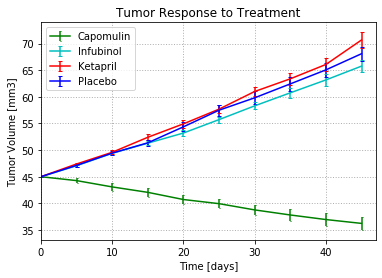

In [96]:
#create a plot for the volume data
# plot the "mean" list vs. the established x axis with error 
# for each of the four drugs on the same coordinate axis

#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)

cap_line_vol = plt.errorbar(xAxis, cap_vol_mean, yerr=cap_vol_sem, fmt="g", capsize=0.5,
                   label="Capomulin")
inf_line_vol = plt.errorbar(xAxis, inf_vol_mean, yerr=inf_vol_sem, fmt="c", capsize=2,
                   label="Infubinol")
keta_line_vol = plt.errorbar(xAxis, keta_vol_mean, yerr=keta_vol_sem, fmt="r", capsize=2,
                   label="Ketapril")
pla_line_vol = plt.errorbar(xAxis, pla_vol_mean, yerr=pla_vol_sem, fmt="b", capsize=2,
                   label="Placebo")
#set the plot title, and axis titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Tumor Volume [mm3]")

# Add the legend and gridlines
plt.legend(loc=2)

tick_locations = [value for value in xAxis]
#plt.set_xticks(tick_locations, minor=False)
plt.grid('on', which='major', axis='both', linestyle='dotted', linewidth=1)

plt.xlim(0, max(xAxis)+2)
        
# Show the scatter plot
plt.show()


